__References___ 

https://seaborn.pydata.org/tutorial/regression.html <br>

J.M.K.C. Donev et al. (2020). Energy Education - Wind power [Online]. 
Available: https://energyeducation.ca/encyclopedia/Wind_power. [Accessed: December 12, 2020].<br>

A Clifton et al (2013) Using machine learning to predict wind turbine power output [Online] Available: https://iopscience.iop.org/article/10.1088/1748-9326/8/2/024009. [Accessed: December 12, 2020].<br>

Ayush Pant (2019)Introduction to Linear Regression and Polynomial Regression [Online] Available:
https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb. [Accessed: December 12, 2020].<br>

Polynomial regression using scikit-learn [Online] Available: https://iq.opengenus.org/polynomial-regression-using-scikit-learn/ . [Accessed: December 12, 2020].<br>

https://www.youtube.com/watch?v=s-i6nzXQF3g  [Accessed: December 15, 2020]

Deploy Machine Learning model Flask on web page https://www.youtube.com/watch?v=i3RMlrx4ol4 [Accessed: December 17, 2020]
Python Pickle Tutorial datacamp.com https://www.datacamp.com/community/tutorials/pickle-python-tutorial [Accessed: December 17, 2020]


In [1]:
import pandas as pd
import sklearn as sklearn
import seaborn as sns
import numpy as numpy
import sklearn.linear_model as lin

In [2]:
#stackoverflow chat suggests that you can't import an external dataset into seaborn, use pandas instead??!!
#It's as though if it's not here >>>https://github.com/mwaskom/seaborn<<< seaborn doesn't want to know.
powerproduction=pd.read_csv("powerproduction.csv")
#powerproduction.describe()
#print(powerproduction)

### Analysis 1

In [3]:
#sns.pairplot(powerproduction)

#### Functions to draw linear regression models

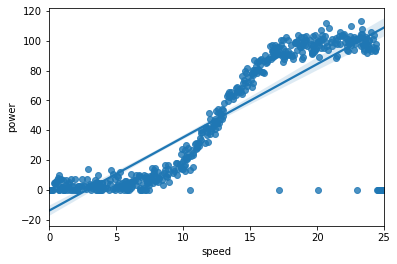

In [4]:
sns.regplot(x="speed", y="power", data=powerproduction);
#sns.regplot(x="power", y="speed", data=powerproduction);
#a blue line appears as a suggestion

Source: https://seaborn.pydata.org/tutorial/regression.html
You should note that the resulting plots are identical, except that the figure shapes are different.
regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. This data format is called “long-form” or “tidy” data. Other than this input flexibility, regplot() possesses a subset of lmplot()’s features, so we will demonstrate them using the latter.

Observations on these graphs
The curve shape corresponds with graphs at https://energyeducation.ca/encyclopedia/Wind_power It is logical, it takes a reasonable amount of wind to get the turbine going and then when it's moving and the wind drops...it will still rotate and come to a stop eventually.
The cut off point seems to be around speed 24.5 kmph.

Turbines are designed to operate within a specific range of wind speeds. The limits of the range are known as the cut-in speed and cut-out speed.The cut-in speed is the point at which the wind turbine is able to generate power. The cut-out speed is the point at which the turbine must be shut down to avoid damage to the equipment. The cut-in and cut-out speeds are related to the turbine design and size and are decided on prior to construction.


#### Train
Attempt to automate the prediction, find relationships between the paired data.

In [5]:
import sklearn.linear_model as lin #manipulate the two lists of numbers x = flipper["body_mass_g"].to_numpy() y = flipper["flipper_length_mm"].to_numpy() #even though you've only one input value, you must reshape as if there are more. It is ascikit learm thing.... x = x.reshape(-1, 1) #use sckitlearn to give numbers pertaining to the suggested blue line above model = lin.LinearRegression() model.fit(x, y)#tells skcitlearn where the values are r = model.score(x, y)#find out the r value, how well the lines fits the data set p = [model.intercept_, model.coef_[0]]#provide the intercept

powerproduction=pd.read_csv("powerproduction.csv")
#manipulate the two lists of numbers


In [6]:
#x=powerproduction["speed"].to_numpy()
speed=powerproduction["speed"].to_numpy()
y=powerproduction["power"].to_numpy()
#y = data["power"].to_numpy()
x = speed.reshape(-1, 1)
model = lin.LinearRegression()
model.fit(x, y)#tells skcitlearn where the values are
r = model.score(x, y)#find out the r value, how well the lines fits the data set
p = [model.intercept_, model.coef_[0]]#provide the intercept

In [7]:
r
#In statistics, the correlation coefficient r measures the strength 
#and direction of a linear relationship between two variables on a scatterplot.
#.72 is not too bad of a fit

0.7289360258564073

In [8]:
p
#The Importance of Intercept
#https://www.analyticsinsight.net/why-is-intercept-important-in-regression-analysis/
#The intercept (often labeled as constant) is the point where the function crosses the y-axis. 
#In some analysis, the regression model only becomes significant 
#when we remove the intercept, and the regression line reduces to Y = bX + error.

[-13.89990263051962, 4.917595665404669]

### Predict

In [9]:
def f(x, p):
# x is the input, p is the parameter/s e.g. a list of values somehow trained on a dataset already
# p can be used to help us make predictions in the case of x
 return p[0] + x * p[1]
#this function is designed to provide linear results
#that is correct because the dataset is linear

In [10]:
#per Ian..... the calculations are straightforward,our ideas behind them are important. 
#the functions might be deterministic maybe the input becomes part of the function (not external data anymore)
f(7, p)
#we can use the p values above where 7 windspeed, how much power is generated?
#we trained p on the dataset, it is a model


20.52326702731306

In [11]:
#you could define another function using p also , see below.

In [12]:
def predict(x):
    return f(x, p)

predict(2.9)
#0.3611247991539184

0.3611247991539184

The web service needs to get input into the function. The function needs to reject amounts higher than 24.399 
The function needs to reject amounts lower than 0.325
#### Breakthrough!
When I leave the dataset as it is , the figures are skewed - it is giving negative value. 
Remove the problematic values to train it properly


In [13]:
powerproduction=pd.read_csv("powerproduction.csv")
#Code adapted from https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df=powerproduction
#print (df.sort_values('power', ascending=True))
new_df = df[df.loc[:]!=0].dropna()
#df.drop(0,111,110,105,89) #this does not work - only deletes index 0
#print(df.drop(['speed'], axis=1))
new_df
#451 rows × 2 columns

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [14]:
#new_df.to_csv(index=False)
newdf_csv_data = new_df.to_csv('new_df.csv', index = False) 
new_df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


#### Analysis 2
Start again with this better dataset



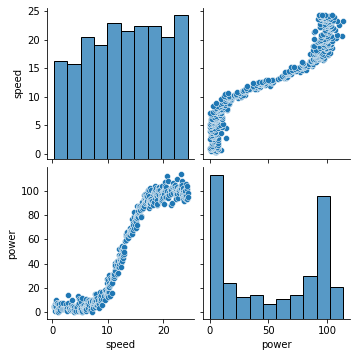

In [15]:
sns.pairplot(new_df)

C:\Users\Acer\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


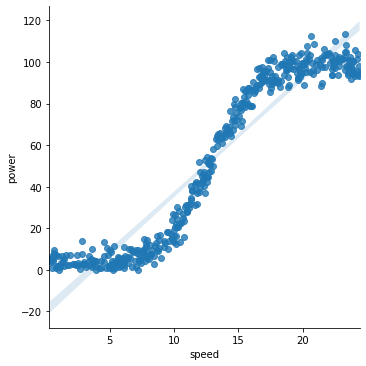

In [16]:
sns.lmplot(x="speed", y="power", data=new_df);


In [17]:
import sklearn.linear_model as lin
powerproduction=pd.read_csv("new_df.csv")
#manipulate the two lists of numbers
#x=powerproduction["speed"].to_numpy()
speed=powerproduction["speed"].to_numpy()
y=powerproduction["power"].to_numpy()
#y = data["power"].to_numpy()

x = speed.reshape(-1, 1)
model = lin.LinearRegression()
model.fit(x, y)#tells skcitlearn where the values are
r = model.score(x, y)#find out the r value, how well the lines fits the data set
p = [model.intercept_, model.coef_[0]]#provide the intercept

In [18]:
r

0.8984832870534454

In [19]:
p

[-19.837685452108403, 5.618827837778542]

In [20]:
def f(x, p):
# x is the input, p is the parameter/s e.g. a list of values somehow trained on a dataset already
# p can be used to help us make predictions in the case of x
    return p[0] + x * p[1]
#this function is designed to provide linear results

In [21]:
f(7, p)

19.494109412341395

In [22]:
def predict(x):
    return f(x, p)

In [23]:
predict(2.9)

-3.5430847225506312

#### Another Breakthrough!

What if the relationship isn't LINEAR, the plot is certainly trying to tell me this.
Also - I'm not doing groundbreaking research here surely someone has done this before??!!
And has figured out the regression.

A Clifton et al in 2013 carried out indepth research to conclude that :
The power output from the turbine is not a linear function of wind speed, it is a complex non-linear function of hub height wind speed, turbulence intensity, and rotor disk shear.
They instead proposed a machine learning technique called 'regression trees'that is implemented in MATLAB
The regression tree method predicts wind turbine energy capture with two to three times more accuracy than the industry-standard power curve method.<br>
#### Not so good
I tried various sample codes to do a regression tree method and they are not working.
They all need two inputs to predict - I think it might be too complex a solution for just two features in a dataset.

In [24]:
#Adapted from https://www.codespeedy.com/decision-tree-regression-in-python-using-scikit-learn/
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [25]:
cleanpowerproduction_df = pd.read_csv("new_df.csv")
cleanpowerproduction_df.columns

Index(['speed', 'power'], dtype='object')

In [26]:
#Now we call our target value for which prediction is to be made.
#hgt = data.Height.values.reshape(-1,1)
#wgt = data.Weight.values.reshape(-1,1)
y = cleanpowerproduction_df.power.values.reshape(-1,1)

#The columns that out inputted into our model are known as 'features.
#These columns are used to determine the home price.

#For now, we will build our model for only a few features.

cleanpowerproduction_features = ['speed', 'power']

X = cleanpowerproduction_df[cleanpowerproduction_features]

# Defining. model.
cleanpowerproduction_model = DecisionTreeRegressor(random_state=42)

# Fit the model
cleanpowerproduction_model.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [27]:
#r = cleanpowerproduction_model.score(X, y)#find out the r value, how well the lines fits the data set
#p = [model.intercept_, model.coef_[0]]#provide the intercept

In [28]:
#We make predictions of Price for first 5 houses using Decision Tree regressor

print("The predictions for following following 5 houses:")
print(X.tail())
print("The predictions made for houses are : ")
print(cleanpowerproduction_model.predict(X.tail()))
#print(cleanpowerproduction_model.predict(X.all()))

The predictions for following following 5 houses:
      speed    power
446  24.249  103.700
447  24.299   93.694
448  24.349   93.078
449  24.374   98.223
450  24.399   95.117
The predictions made for houses are : 
[103.7    93.694  93.078  98.223  95.117]


In [29]:
#cleanpowerproduction_model.predict(X.tail())
#cleanpowerproduction_model.predict([[17,1]])
#cleanpowerproduction_model.predict([[17]])


In [30]:
#Adapted from https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
# import numpy package for arrays and stuff 
import numpy as np  
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
# import pandas for importing csv files  
import pandas as pd 

In [31]:
#Step 2: Initialize and print the Dataset.
# import dataset 
dataset = pd.read_csv("new_df.csv") 

In [32]:
# print the dataset 
print(dataset) 

      speed    power
0     0.325    4.331
1     0.400    5.186
2     0.450    3.826
3     0.501    1.048
4     0.526    5.553
..      ...      ...
446  24.249  103.700
447  24.299   93.694
448  24.349   93.078
449  24.374   98.223
450  24.399   95.117

[451 rows x 2 columns]


In [33]:
#Step 3: Select all the rows and column 1 from dataset to “X”

In [34]:
# select all rows by : and column 1 
# by 1:2 representing features 
#X = dataset[:, 1:2].astype(int) 
X = dataset.power.astype(int) 

#X = dataset[dataset_features] 
# print X 
print(X)

0        4
1        5
2        3
3        1
4        5
      ... 
446    103
447     93
448     93
449     98
450     95
Name: power, Length: 451, dtype: int32


In [35]:
#Step 4: Select all of the rows and column 2 from dataset to “y"
# select all rows by : and column 2 
# by 2 to Y representing labels 
#y = dataset[:, 1].astype(int)  
y = dataset.speed
#y.reshape(-1, 1)
# print y 
#print(y)

In [36]:
# create a regressor object 
#regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
#regressor.fit(X, y) 

# predicting a new value 

# test the output by changing values, like 3750 
#y_pred = regressor.predict([[8]]) 

# print the predicted price 
#print("Predicted price: % d\n"% y_pred) 

#### Maybe polynomial is a better fit, a quick image search suggests a similar shape

What is Regression?
Using the relationship between variables to find the best fit line or the regression equation that can be used to make predictions”. (https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)
Polynomial Regression
Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is not linear but it is the nth degree of polynomial.
adapted from https://iq.opengenus.org/polynomial-regression-using-scikit-learn/
In this example we will apply linear regression as well as polynomial regression on the same dataset and will see the results of both the models.

In [37]:
#Adapted from https://iq.opengenus.org/polynomial-regression-using-scikit-learn/
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#importing the dataset
polydataset=pd.read_csv('new_df.csv')
#polydataset.info

In [39]:
#Now we divide the dataset into X and y,where X is the independent variable (windspeed) and y (power produced) is the dependent variable .
#X=dataset.iloc[:,1:2].values
#y=dataset.iloc[:,2].values
#X = polydataset.speed.reshape(-1, 1)
#This numpy array and reshaping stuff is to avoid errors later on.
speed = polydataset.speed.to_numpy()
y = polydataset.power.to_numpy()


#speed=powerproduction["speed"].to_numpy()
#y=powerproduction["power"].to_numpy()
#y = data["power"].to_numpy()
X = speed.reshape(-1, 1)
#model = lin.LinearRegression()

In [40]:
#fitting the linear regression model to the dataset
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

r = lin_reg.score(X,y)#find out the r value, how well the lines fits the data set
p = [lin_reg.intercept_, lin_reg2.coef_[0]]#provide the intercept

NameError: name 'lin_reg2' is not defined

In [ ]:
r

In [ ]:
p

In [47]:
#fitting the polynomial regression model to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)


r = lin_reg2.score(X_poly,y)#find out the r value, how well the lines fits the data set
p = [lin_reg2.intercept_, lin_reg2.coef_[0]]#provide the intercept

In [ ]:
r
#the best possible score is 1.0

In [ ]:
p = [lin_reg2.intercept_, lin_reg2.coef_[0]]#provide the intercept
p

In [ ]:
#Visualising the linear regression model results
plt.subplot(1,2,1)
plt.scatter(X,y,color='seagreen')
plt.plot(X,lin_reg.predict(X),color='darkgrey')
plt.title('Linear Regression')
plt.xlabel('Power')
plt.ylabel('Speed')

#Visualising the polynomial regression model results
plt.subplot(1,2,2)#2 is passed in so that this subplot will appear as the second one
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='seagreen')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='darkgrey')
plt.title('Polynomial Regression')
plt.xlabel('Power')
plt.ylabel('Speed')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.suptitle('Power Production')



In [ ]:
#Visualising the pollynomial regression model results
#plt.subplot(1,2,2)
#X_grid=np.arange(min(X),max(X),0.1)
#X_grid=X_grid.reshape((len(X_grid),1))
#plt.scatter(X,y,color='green')
#plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
#plt.title('Power Production(Polynomial Regression)')
#plt.xlabel('Power')
#plt.ylabel('Speed')
#plt.show()

In [ ]:
#oh yes that is a sweet looking fit!

In [ ]:
#predicting the result of linear regression model.
lin_reg.predict( ([ [20.5] ]) )

In [48]:
#predicting the result of polynomial regression.
lin_reg2.predict( poly_reg.fit_transform(([ [20.5] ]) ))

array([104.56547518])

#### Turn the code into a function

In [54]:
def predict():
    return lin_reg2.predict( poly_reg.fit_transform(([ [6.5] ]) ))

In [55]:
predict()

array([4.22203002])

In [56]:
def predictx():
    return lin_reg2.predict( poly_reg.fit_transform(([ [x] ]) ))

In [59]:
predictx(5)

TypeError: predictx() takes 0 positional arguments but 1 was given

In [43]:
predict()


NameError: name 'lin_reg2' is not defined

In [ ]:
#https://developer.ibm.com/technologies/artificial-intelligence/tutorials/deploy-a-python-machine-learning-model-as-a-web-service/
import pickle
import flask
import os

app = flask.Flask(__name__)

#port = int(os.getenv("PORT", 9099))

#Import the model file that was created previously:model = pickle.load(open("linearmodel.pkl","rb"))
model= pickle.load(open("lin_reg2.pkl","rb"))
#pickle.dump(lin_reg2, open("lin_reg2.pkl","wb"))
@app.route("/")
def hello():
    return "this is where the machine learning model gets API-ed!"

#Add a route that will allow you to send a JSON body of features and will return a prediction:
@app.route('/index', methods=['POST'])
def predict():

    features = flask.request.get_json(force=True)['features']
    prediction = model.predict([features])[0,0]
    response = {'prediction': prediction}

    return flask.jsonify(response)

if __name__ == '__main__':
    app.run(debug=True)
 #    app.run(host='0.0.0.0', port=port)